### Example 1: 2 node system

#### Importing packages

In [127]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import cartopy as ccrs

#### Step 1:Fuel data, Powerplant efficiencies & Specific emissions

In [128]:
#A) fuel costs in € / MWh$_{th}$ 
fuel_cost = {"coal": 30, "oil": 50, "gas": 55}

In [129]:
# B) efficiencies of thermal power plants in MWh$_{el}$ / MWh$_{th}$
efficiency = {"coal": 0.33, "oil": 0.35, "gas": 0.58}

In [130]:
# C) Specific emissions are in t/MWh thermal
emissions = dict(
    coal=0.34, 
    gas=0.2, 
    oil=0.26,
    geothermal=0.01
)

In [131]:
# D) Power plant capacities in MWp
power_plants = {
    "Ambon_1":{"geothermal": 600, "gas": 8000},
    "Ambon_2":{ "oil": 2000, "gas": 2000, "coal":500},
}

In [132]:
# E) Add load in MW
loads={
    "Ambon_1":7000,
    "Ambon_2":3000,
}

#### Step 2: Building Basic network

In [133]:
# A) Create a network object
n=pypsa.Network()

In [134]:
# B) Add buses
n.add("Bus", "Ambon_1", y=-30.5, x= 25, v_nom=400, carrier='AC')#Ambon_1
n.add("Bus", "Ambon_2", y=-18.5, x= 35.5, v_nom=400, carrier='AC') #Ambon_2

In [135]:
# C) Add carriers with emissions associated with it
n.madd(
    "Carrier",
    ["coal", "gas", "oil", "geothermal"], 
    co2_emissions=emissions,
    nice_name=["Coal", "Gas", "Oil","geothermal_plant"],
    color=["black", "indianred", "grey","blue"],
) 

Index(['coal', 'gas', 'oil', 'geothermal'], dtype='object')

In [136]:
# D) Add generators in loop for type of powerplants mentioned already (For Ambon_1)
for tech, capacity in power_plants["Ambon_1"].items(): #Using .items() to access key-value pairs
    n.add("Generator",
        f"Ambon_1_{tech}",
        bus="Ambon_1",
        carrier = tech,
        efficiency = efficiency.get(tech, 1),
        p_nom=capacity,
        marginal_cost=fuel_cost.get(tech, 0) / efficiency.get(tech, 1),
)

In [137]:
# D) Add generators in loop for type of powerplants mentioned already (For Ambon_1)
for tech, capacity in power_plants["Ambon_2"].items(): #Using .items() to access key-value pairs
    n.add("Generator",
        f"Ambon_2_{tech}",
        bus="Ambon_2",
        carrier = tech,
        efficiency = efficiency.get(tech, 1),
        p_nom=capacity,
        marginal_cost=fuel_cost.get(tech, 0) / efficiency.get(tech, 1),
)

In [138]:
n.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Ambon_1_geothermal,Ambon_1,PQ,,600.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Ambon_1_gas,Ambon_1,PQ,,8000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Ambon_2_oil,Ambon_2,PQ,,2000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Ambon_2_gas,Ambon_2,PQ,,2000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Ambon_2_coal,Ambon_2,PQ,,500.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [139]:
# E) Add electricity demand
n.add("Load",
    "Ambon_1_elec_demand",
    bus="Ambon_1",
    p_set=loads["Ambon_1"],
    carrier='electricity',
)

In [140]:
# E) Add electricity demand
n.add("Load",
    "Ambon_2_elec_demand",
    bus="Ambon_2",
    p_set=loads["Ambon_2"],
    carrier='electricity',
)

In [141]:
# F) Add line connection between the buses
n.add("Line",
    "Bus_1-Bus_2",
    bus0="Ambon_1",
    bus1="Ambon_2",
    s_nom=500,
    x=1,
)

In [142]:
n.lopf(solver_name='glpk')

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 0.08s
INFO:pypsa.linopf:Solve linear problem using Glpk solver
INFO:pypsa.linopf:Optimization successful. Objective value: 8.89e+05


('ok', 'optimal')

c:\Users\par19744\.conda\envs\pypsa-eur\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


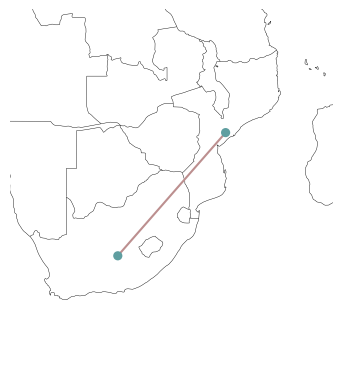

In [149]:
n.plot(bus_sizes=0.2, margin=1);

In [143]:
n.generators_t.p

Generator,Ambon_1_geothermal,Ambon_1_gas,Ambon_2_oil,Ambon_2_gas,Ambon_2_coal
snapshot,,,,,
now,600.0,6900.0,0.0,2000.0,500.0


In [144]:
n.buses_t.marginal_price

Bus,Ambon_1,Ambon_2
snapshot,,
now,94.8276,142.857


In [145]:
s = n.loads.groupby('bus').p_set.sum() / 1e4

In [146]:
n.generators_t.p.loc["now"]

Generator
Ambon_1_geothermal     600.0
Ambon_1_gas           6900.0
Ambon_2_oil              0.0
Ambon_2_gas           2000.0
Ambon_2_coal           500.0
Name: now, dtype: float64

Text(0, 0.5, 'GW')

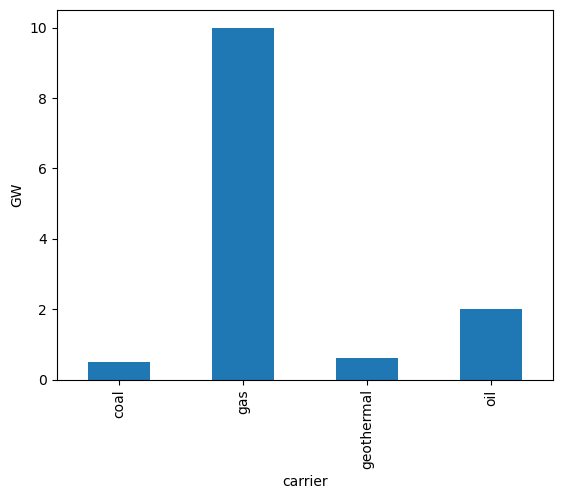

In [148]:
n.generators.groupby("carrier").p_nom.sum().div(1e3).plot.bar()
plt.ylabel('GW')